# Exploratory Data Analysis

### Objective : 
#### This case requires developing a customer segmentation to give recommendations like saving plans, loans, wealth management, etc. on target customer groups.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv("../data/customer_data_complete.csv")

In [3]:
display(df.head())
display(df.info())
display(df.describe().T)

balance  balance_frequency  purchases  oneoff_purchases  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   installments_purchases  cash_advance  purchases_frequency  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                0.000000               0.0            2.0        1000.0   
1                0.250000               4.0            0.0        7000.0   
2                0.000000               0.0           12.0        7500.0   
3                0.083333               1.0            1.0        7500.0   
4                0.000000               0.0            1.0        1200.0   

      payments  minimum_payments  prc_full_payment  tenure  
0   201.802084        139.509787          0.000000    12.0  
1  4103.032597       1072.340217          0.222222    12.0  
2   622.066742        627.284787          0.000000    12.0  
3     0.000000        456.708235          0.000000    12.0  
4   678.334763        244.791237          0.000000    12.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance                           8949 non-null   float64
 1   balance_frequency                 8949 non-null   float64
 2   purchases                         8949 non-null   float64
 3   oneoff_purchases                  8949 non-null   float64
 4   installments_purchases            8949 non-null   float64
 5   cash_advance                      8949 non-null   float64
 6   purchases_frequency               8949 non-null   float64
 7   oneoff_purchases_frequency        8949 non-null   float64
 8   purchases_installments_frequency  8949 non-null   float64
 9   cash_advance_frequency            8949 non-null   float64
 10  cash_advance_trx                  8949 non-null   float64
 11  purchases_trx                     8949 non-null   float64
 12  credit

None

count         mean          std  \
balance                           8949.0  1564.647593  2081.584016   
balance_frequency                 8949.0     0.877350     0.236798   
purchases                         8949.0  1003.316936  2136.727848   
oneoff_purchases                  8949.0   592.503572  1659.968851   
installments_purchases            8949.0   411.113579   904.378205   
cash_advance                      8949.0   978.959616  2097.264344   
purchases_frequency               8949.0     0.490405     0.401360   
oneoff_purchases_frequency        8949.0     0.202480     0.298345   
purchases_installments_frequency  8949.0     0.364478     0.397451   
cash_advance_frequency            8949.0     0.135141     0.200132   
cash_advance_trx                  8949.0     3.249078     6.824987   
purchases_trx                     8949.0    14.711476    24.858552   
credit_limit                      8949.0  4494.449450  3638.815725   
payments                          8949.0  1733.336511  2895.168146   
minimum_payments                  8949.0   715.141477  1149.162542   
prc_full_payment                  8949.0     0.153732     0.292511   
tenure                            8949.0    11.517935     1.337134   

                                         min          25%          50%  \
balance                             0.000000   128.365782   873.680279   
balance_frequency                   0.000000     0.888889     1.000000   
purchases                           0.000000    39.800000   361.490000   
oneoff_purchases                    0.000000     0.000000    38.000000   
installments_purchases              0.000000     0.000000    89.000000   
cash_advance                        0.000000     0.000000     0.000000   
purchases_frequency                 0.000000     0.083333     0.500000   
oneoff_purchases_frequency          0.000000     0.000000     0.083333   
purchases_installments_frequency    0.000000     0.000000     0.166667   
cash_advance_frequency              0.000000     0.000000     0.000000   
cash_advance_trx                    0.000000     0.000000     0.000000   
purchases_trx                       0.000000     1.000000     7.000000   
credit_limit                       50.000000  1600.000000  3000.000000   
payments                            0.000000   383.282850   857.062706   
minimum_payments                 -831.978304   167.725809   300.620447   
prc_full_payment                    0.000000     0.000000     0.000000   
tenure                              6.000000    12.000000    12.000000   

                                          75%          max  
balance                           2054.372848  19043.13856  
balance_frequency                    1.000000      1.00000  
purchases                         1110.170000  49039.57000  
oneoff_purchases                   577.830000  40761.25000  
installments_purchases             468.650000  22500.00000  
cash_advance                      1113.868654  47137.21176  
purchases_frequency                  0.916667      1.00000  
oneoff_purchases_frequency           0.300000      1.00000  
purchases_installments_frequency     0.750000      1.00000  
cash_advance_frequency               0.222222      1.50000  
cash_advance_trx                     4.000000    123.00000  
purchases_trx                       17.000000    358.00000  
credit_limit                      6500.000000  30000.00000  
payments                          1901.279320  50721.48336  
minimum_payments                   800.097611  12496.86093  
prc_full_payment                     0.142857      1.00000  
tenure                              12.000000     12.00000

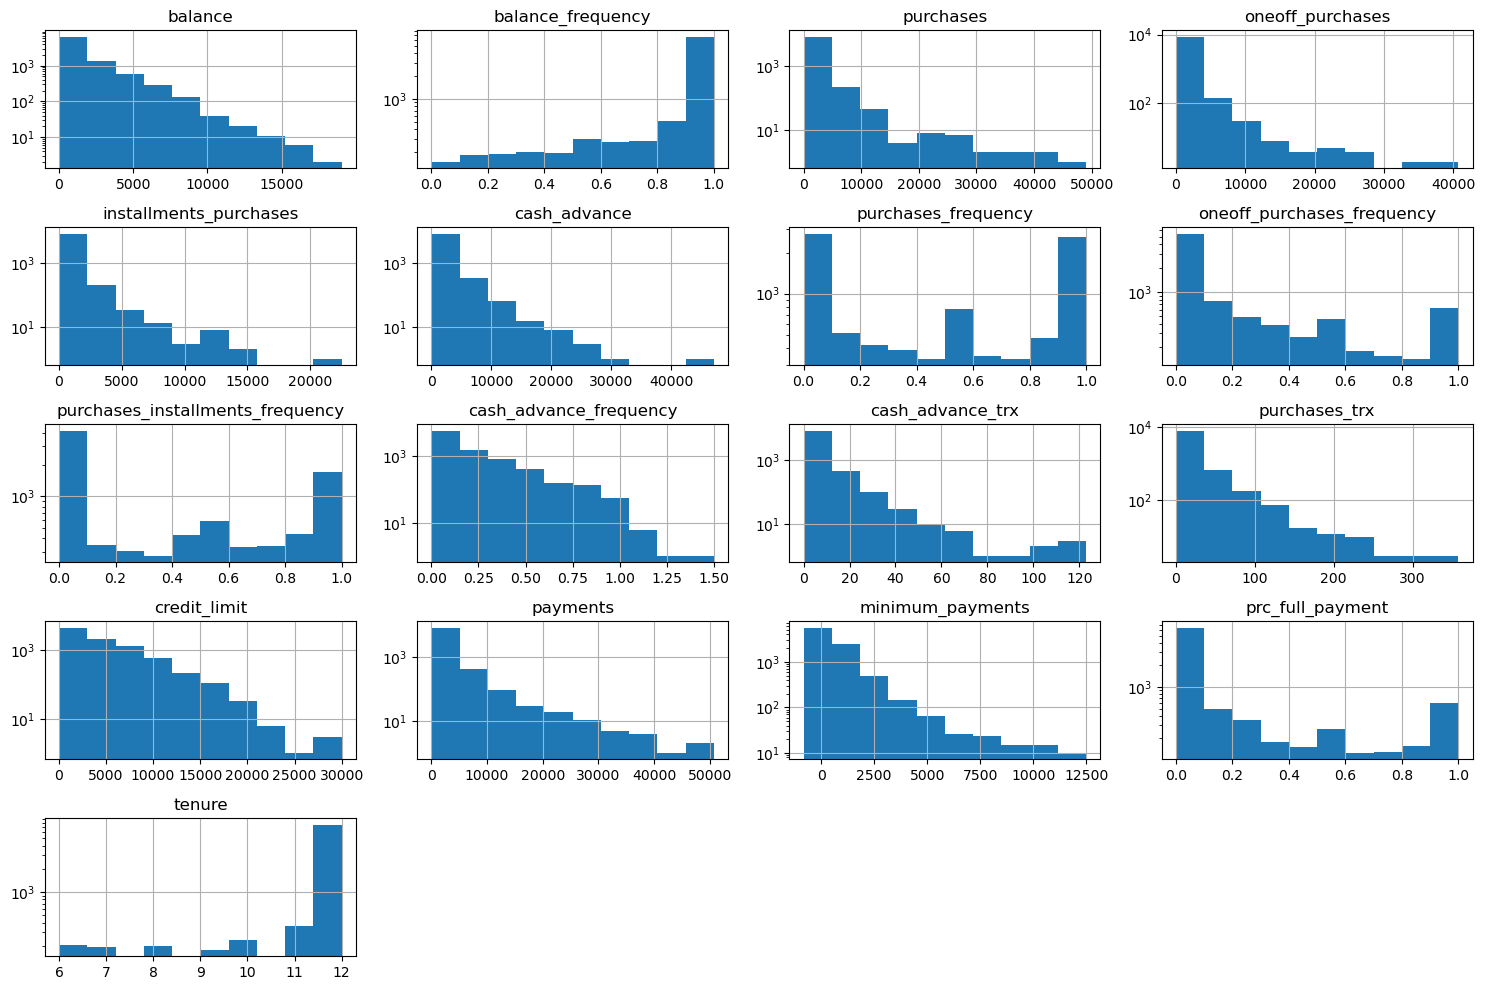

In [4]:
df.hist(figsize=(15,10), log=True)
plt.tight_layout()

Nothing really jumps out to me as being strange about any of these distributions. How about pairplot?

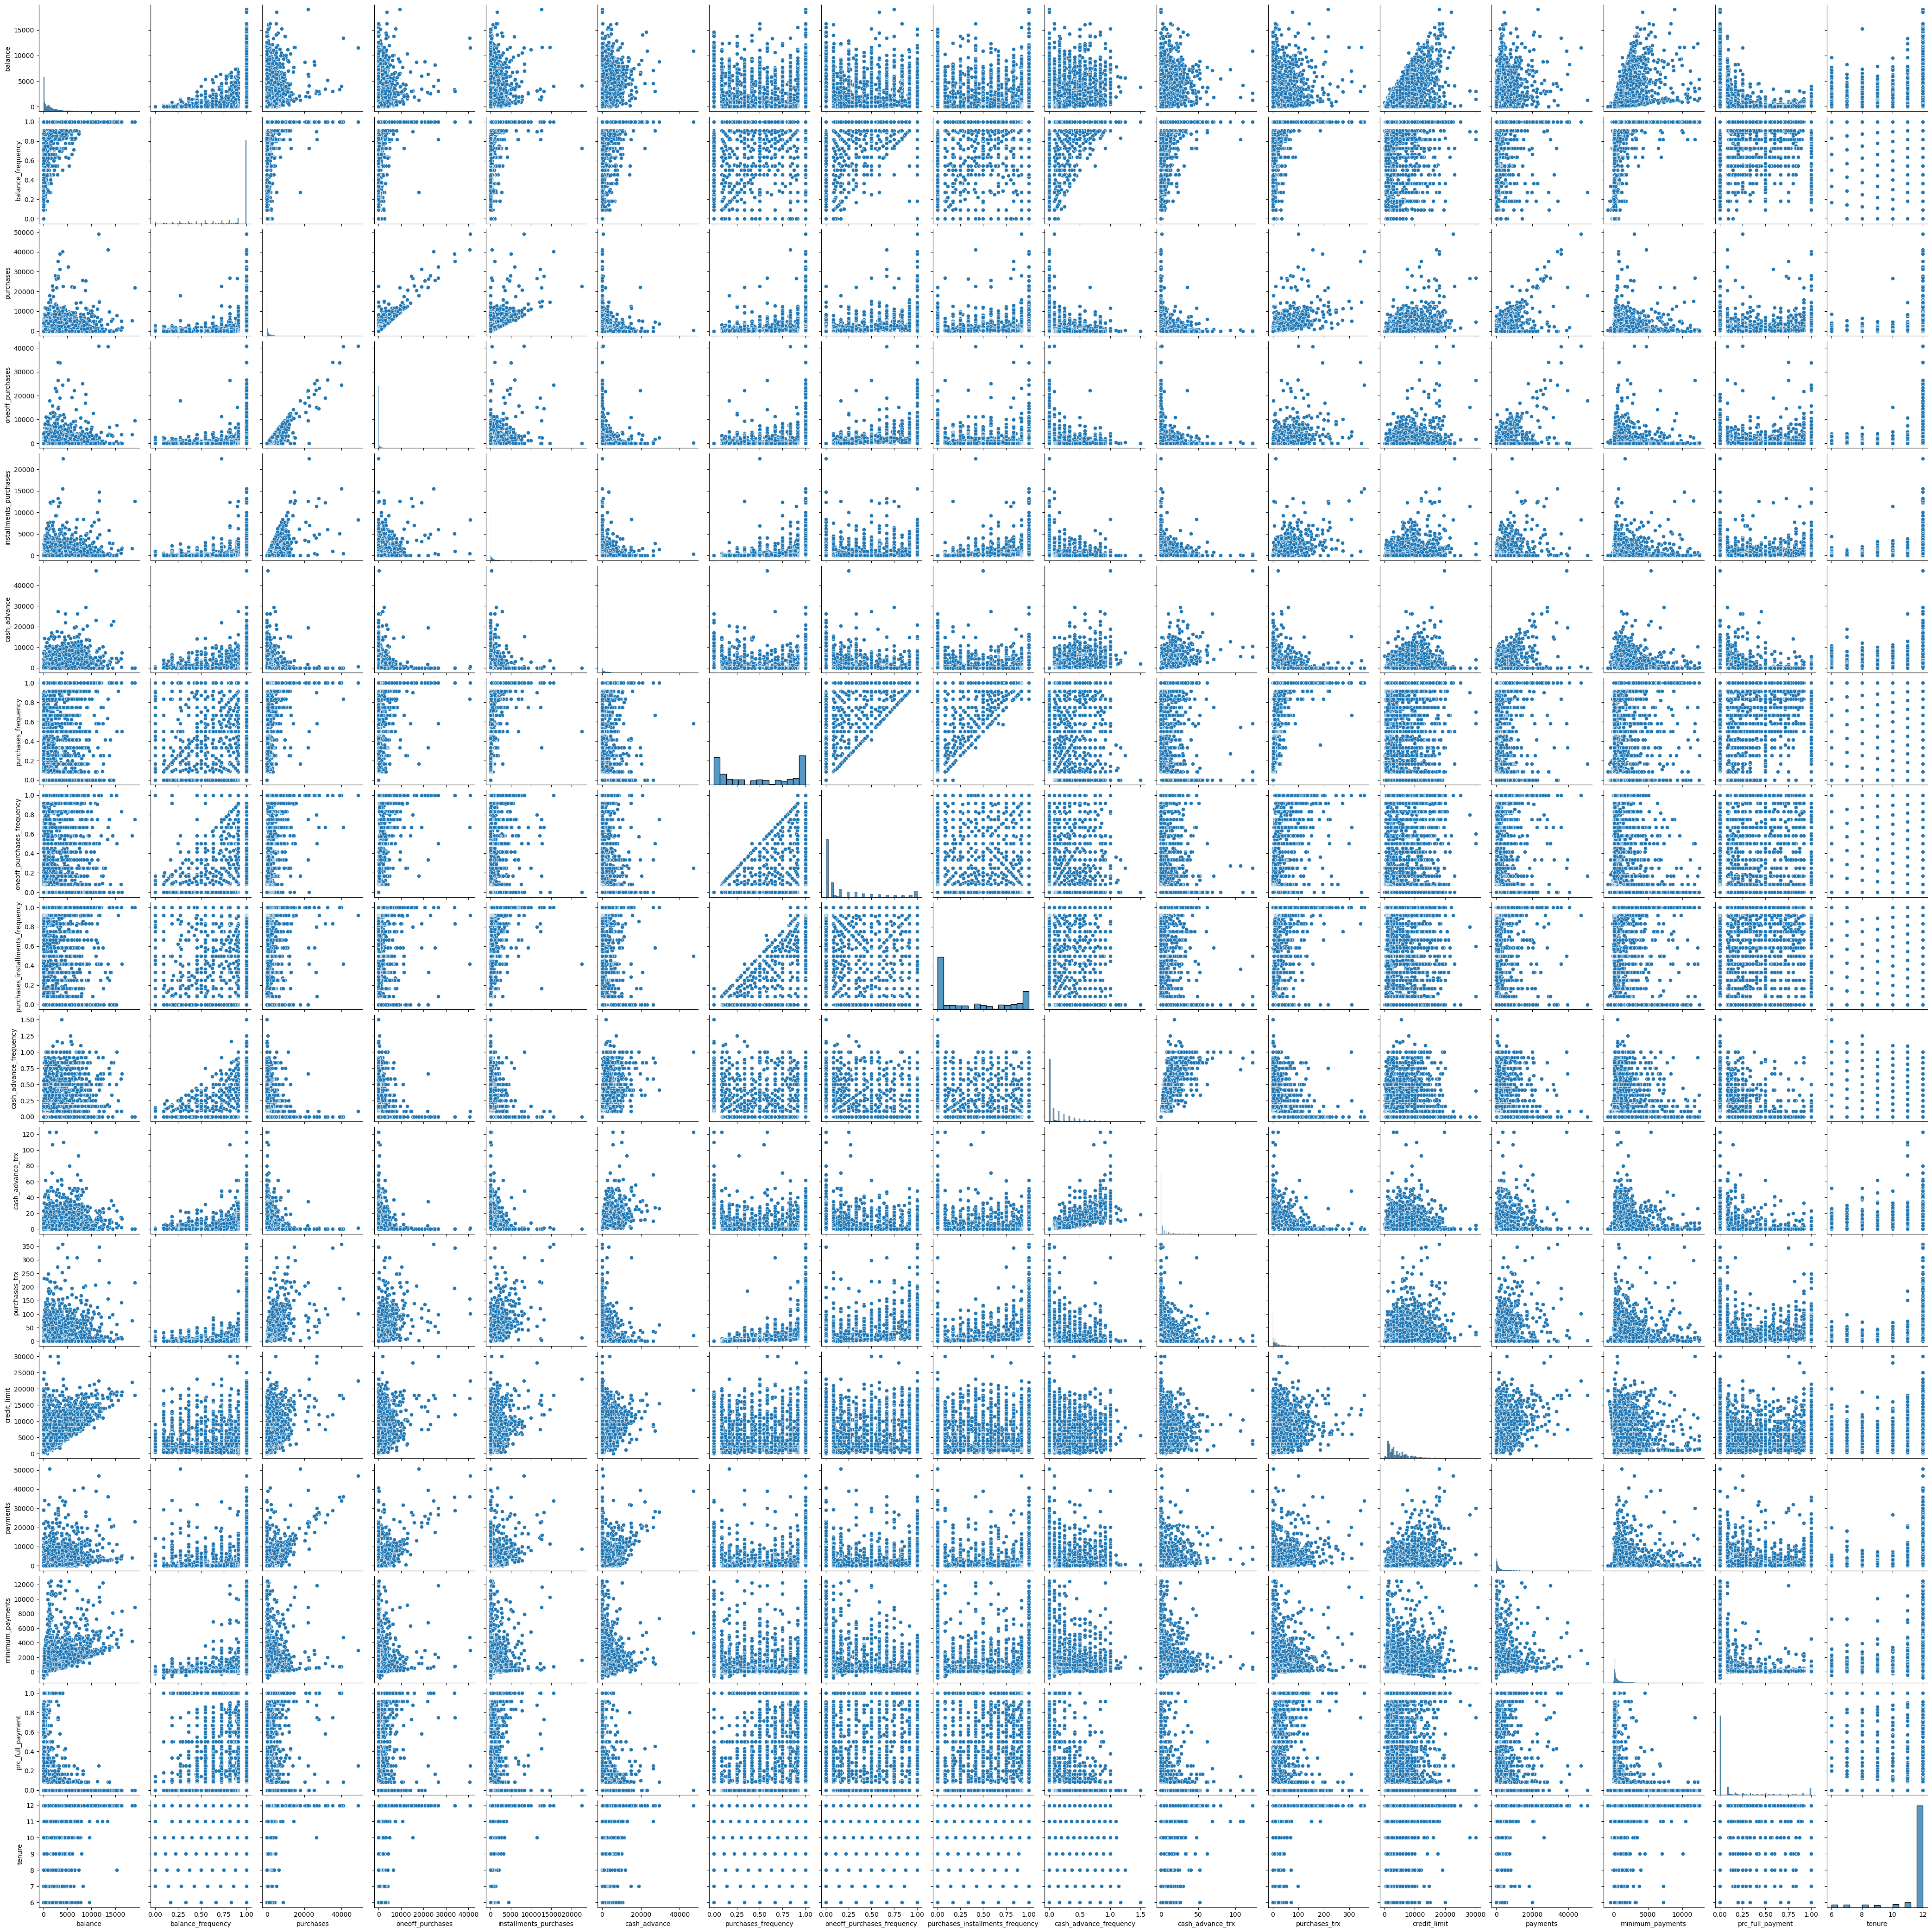

In [5]:
sns.pairplot(df)

Not really sure pairplot tells me a huge amount when we do not have a variable to predict but instead we are tasked with grouping the data.

<AxesSubplot: >

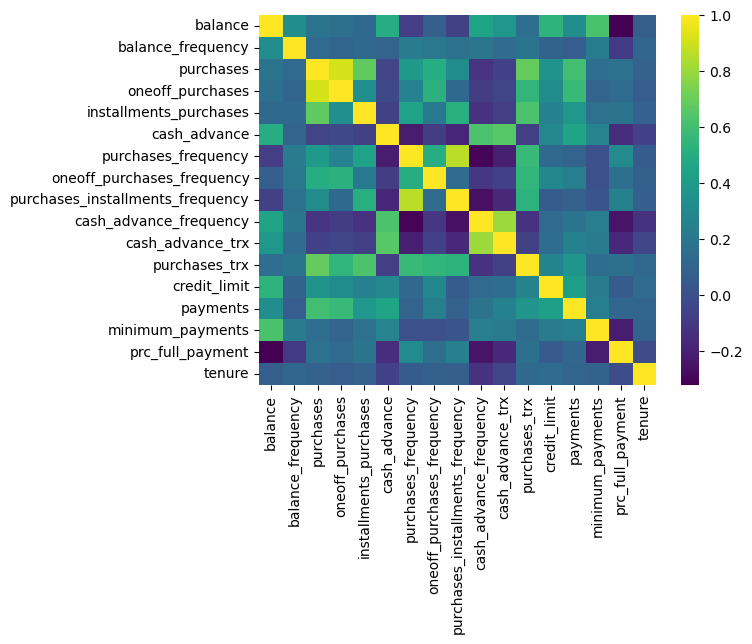

In [6]:
sns.heatmap(df.corr(), cmap='viridis')

- purchases and one-off purchases correlated.
- purchases and purchases_installments_frequency correlated -> Makes sense. 
- cash_advance and cash_advance_trx correlated -> Makes sense.


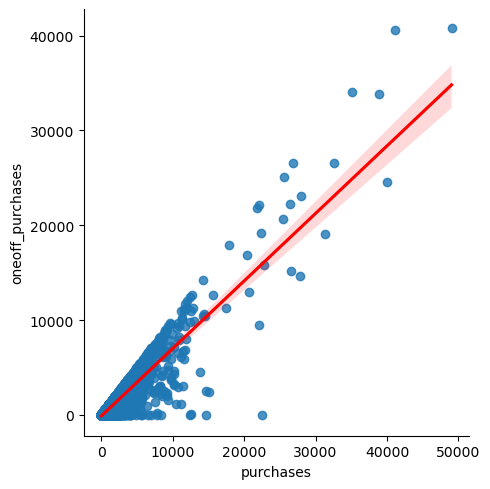

In [7]:
sns.lmplot(df, x='purchases', y='oneoff_purchases', line_kws={'color': 'red'})

Likely that once we reduce the dimensionality of our dataframe down that some of this information will be lost as it is not providing much insight into anything new.

# Findings
Not a huge amount from this EDA as we do not have labels to compare to. I think we will learn much more by trying to cluster our data, creating some labels from this clustering and then reinvestigating the clusters to see what they are like.